# Probability

# Importing useful libraries

In [1]:
# Importing the pandas library for data manipulation
import pandas as pd

# Import numpy library for efficient numeric operations
import numpy as np

# Imports the matplotlib.pyplot library to create graphical visualizations.
import matplotlib.pyplot as plt

# Importing the data used

In [2]:
df = pd.read_excel('dados_cancerpositivo.xlsx', index_col = 'Número')

# Defining the functions used to calculate probability

In [3]:
''' General probability calculation '''

def probabilidade(valor_1, valor_2, valor_3, valor_4):
    # Separating patients who are positive for the desired parameters
    pergunta = df.loc[(valor_1) & (valor_2)] # more restrictive
    # Ensuring that in this selection, all patients have information about the desired parameter
    pergunta.dropna(subset=[valor_3], inplace=True)
    total = len(df.loc[(valor_1) & (valor_2)])
    # Separating the patients who have information for the criteria
    parametro_pergunta = len(pergunta.loc[pergunta[valor_3]==valor_4])
    # Calculating the probability
    probabilidade = round(parametro_pergunta/total * 100, 2)
    
    return '{}%'.format(probabilidade)

In [4]:
''' Calculation for probability in lymph nodes'''

def probabilidade_linf(valor_1, valor_2, valor_3):
    # Separating patients who are positive for the desired parameters
    pergunta = (df.loc[(valor_1) & (valor_2)]) # more restrictive
    # Ensuring that in this selection, all patients have information about the desired parameter
    pergunta.dropna(subset=[valor_3], inplace=True)
    total = len(df.loc[(valor_1) & (valor_2)])
    # Separating the patients who have information for the criteria
    parametro_pergunta = len(pergunta.loc[pergunta[valor_3]>= 1.0])
    # Calculating the probability
    probabilidade = round(parametro_pergunta/total * 100, 2)
    
    return '{}%'.format(probabilidade)

# Calculating the odds

## Menopausal status

What is the probability of patients exposed to pesticides going through menopause?

In [7]:
menopausa = probabilidade(df['Exposure to pesticides']==1, df['Exposure to pesticides']==1, 'Menopausal status', 1)
print('The probability is', menopausa)

The probability is 62.5%


What is the probability of patients not exposed to pesticides going through menopause?

In [8]:
menopausa_n = probabilidade(df['Exposure to pesticides']==0, df['Exposure to pesticides']==0, 'Menopausal status', 1)
print('The probability is', menopausa_n)

The probability is 63.12%


## Metastasis

What is the probability of patients exposed to pesticides to develop metastasis?

In [9]:
metastase = probabilidade(df['Exposure to pesticides']==1, df['Exposure to pesticides']==1, 'Distant metastasis', 1)
print('The probability is', metastase)

The probability is 37.02%


What is the probability of patients not exposed to pesticides to develop metastasis?

In [10]:
metastase_n = probabilidade(df['Exposure to pesticides']==0, df['Exposure to pesticides']==0, 'Distant metastasis', 1)
print('The probability is', metastase_n)

The probability is 26.24%


## Lymph node positivity

What is the probability of patients exposed to pesticides to develop lymph node positivity?

In [11]:
linfo = probabilidade_linf(df['Exposure to pesticides']==1, df['Exposure to pesticides']==1, 'Lymph node')
print('The probability is', linfo)

The probability is 33.17%


What is the probability of patients not exposed to pesticides to develop lymph node positivity?

In [12]:
linfo_n = probabilidade_linf(df['Exposure to pesticides']==0, df['Exposure to pesticides']==0, 'Lymph node')
print('The probability is', linfo_n)

The probability is 24.11%


## Angiolymphatic emboli

What is the probability of patients exposed to pesticides to develop angiolymphatic emboli?

In [13]:
emb = probabilidade(df['Exposure to pesticides']==1, df['Exposure to pesticides']==1, 'Angiolymphatic emboli', 1)
print('The probability is', emb)

The probability is 25.0%


What is the probability of patients not exposed to pesticides to develop angiolymphatic emboli?

In [14]:
emb_n = probabilidade(df['Exposure to pesticides']==0, df['Exposure to pesticides']==0, 'Angiolymphatic emboli', 1)
print('The probability is', emb_n)

The probability is 22.7%


## Chemoresistance

What is the probability of patients exposed to pesticides to show chemoresistance to treatment?

In [15]:
quimio = probabilidade(df['Exposure to pesticides']==1, df['Exposure to pesticides']==1, 'Chemoresistance', 1)
print('The probability is', quimio)

The probability is 21.15%


What is the probability of patients not exposed to pesticides to show chemoresistance to treatment?

In [16]:
quimio_n = probabilidade(df['Exposure to pesticides']==0, df['Exposure to pesticides']==0, 'Chemoresistance', 1)
print('The probability is', quimio_n)

The probability is 17.02%


# Plotting graph with probabilities

In [17]:
# Instantiating the probabilities of patients exposed and not exposed to pesticides in a list
prob_exp = [menopausa, metastase, linfo, emb, quimio]
prob_nao_exp = [menopausa_n, metastase_n, linfo_n, emb_n, quimio_n]

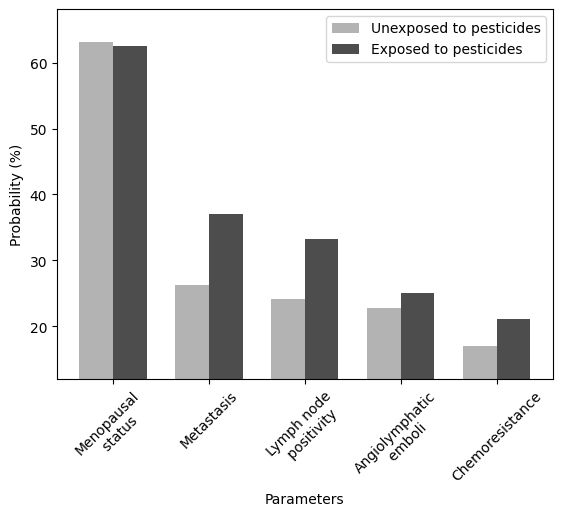

In [18]:
parametros = ['Menopausal status', 'Metastasis', 'Lymph node positivity', 'Angiolymphatic emboli', 'Chemoresistance']
frequencia_nao_exp = prob_nao_exp
frequencia_exp = prob_exp

# Convert string frequencies to numbers
frequencia_nao_exp_numeros = [float(valor.strip('%')) for valor in frequencia_nao_exp]
frequencia_exp_numeros = [float(valor.strip('%')) for valor in frequencia_exp]

# Setting the y-axis range based on values
y_min = min(frequencia_nao_exp_numeros + frequencia_exp_numeros)
y_max = max(frequencia_nao_exp_numeros + frequencia_exp_numeros)
y_min = max(0, y_min - 5)
y_max = y_max + 5

# Defining the width of the bars and adjusting their position
largura_barra = 0.35
x = np.arange(len(parametros))

# Customizing the bar colors
cor_claro = '0.7'  # light gray
cor_escuro = '0.3' # darker gray

# Defining the position of the bars side by side
x_nao_exp = x - largura_barra/2
x_exp = x + largura_barra/2

barra1 = plt.bar(x_nao_exp, frequencia_nao_exp_numeros, largura_barra, label='Unexposed to pesticides', color=cor_claro)
barra2 = plt.bar(x_exp, frequencia_exp_numeros, largura_barra, label='Exposed to pesticides', color=cor_escuro)

# Adding labels to axes
plt.xlabel('Parameters')
plt.ylabel('Probability (%)')

# Setting the y-axis range
plt.ylim(y_min, y_max)

# List of custom line break strings for each parameter
parametros_quebrados = [
    'Menopausal\n status',
    'Metastasis',
    'Lymph node\n positivity',
    'Angiolymphatic\n emboli',
    'Chemoresistance'
]

# Display parameter values below bars (with custom line wrapping)
plt.xticks(x, parametros_quebrados, rotation=45)

# Adding a caption
plt.legend()

# Displaying the graph
plt.show()